In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Focntion pour afficher des information sur le DataSET 
def information (df) :
    print('***************')
    print(df.shape)
    print(df.columns)
    print(df.info())
    print(df.isna().sum())
    
#Traitement des valeurs aberrantes avec l'IQR en remplaçant par la médiane
#L'IQR ne sert qu'avec une distribution en cloche ==> Finalement pas utilisé dans notre contexte
def outlier_detect(df,coeff):
    #Parcours de toutes les colonnes du dataframe
    for i in df.describe().columns:
        #Récupération des valeurs des valeurs de Quartiles 0.25 et 0.75
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        #Calcul de l'écart InterQuartile
        IQR = Q3 - Q1
        #Borne Haute et basse généralement 1,5 fois l'IQR
        LTV=Q1 - coeff * IQR
        UTV=Q3 + coeff * IQR
        #Remplacement de la valeur aberrante par la médiane
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
               p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

#Affichage d'une boite à moustache avec les valeurs aberrantes
def box(df_in, col_name):
   title = get_iqr_text(df_in, col_name)
   sns.boxplot(x = df_in[col_name])
   plt.title(title)
   plt.show()

#Compte les valeurs aberrantes avec l'IQR  
def count_outliers(df_in, col_name):
   median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
   df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
   return df_outliers.shape[0]

#Calcul les quartiles
def get_iqr_values(df_in, col_name):
   median = df_in[col_name].median()
   q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
   q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
   iqr = q3-q1 #Interquartile range
   minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
   maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
   return median, q1, q3, iqr, minimum, maximum

# Retourne les informations en texte pour le titre du graphqiue
def get_iqr_text(df_in, col_name):
   median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
   text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
   return text


#Compte les valeurs aberrantes avec des valeurs métiers  
def compte_valaberrante(df_in, col_name,minimum,maximum):
   df_outliers = df_in.loc[(df_in[col_name] < minimum) | (df_in[col_name] > maximum)]
   print("Valeurs Aberrantes",col_name," : ",len(df_outliers.index))

In [3]:
#Lecture du Fichier
df = pd.read_csv('fr.openfoodfacts.org.products_Echantillon.csv', sep = '\t', encoding='UTF-8')

C:\Users\jerom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


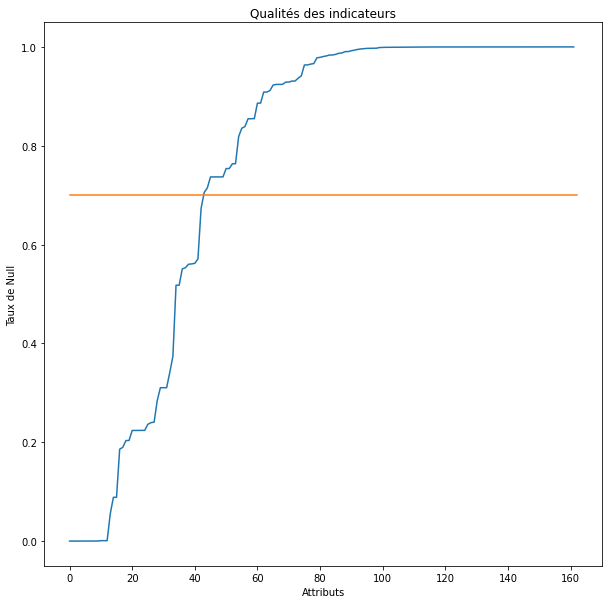

,last_modified_t,last_modified_datetime,creator,created_t,created_datetime,code,url,states,states_tags,states_fr,...,fiber_100g,additives_fr,additives_tags,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,quantity
0,1474103893,2016-09-17T09:18:13Z,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,3087,http://world-fr.openfoodfacts.org/produit/0000...,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1kg
1,1489069957,2017-03-09T14:32:37Z,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,4530,http://world-fr.openfoodfacts.org/produit/0000...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,3.6,NaN,NaN,0.018,0.0,0.000,0.0214,0.00129,0.0,NaN
2,1489069957,2017-03-09T14:32:37Z,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,4559,http://world-fr.openfoodfacts.org/produit/0000...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,7.1,NaN,NaN,0.000,0.0,0.071,0.0000,0.00129,0.0,NaN
3,1489055731,2017-03-09T10:35:31Z,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,16087,http://world-fr.openfoodfacts.org/produit/0000...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,7.1,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN
4,1489055653,2017-03-09T10:34:13Z,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,16094,http://world-fr.openfoodfacts.org/produit/0000...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,1491244498,2017-04-03T18:34:58Z,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
320768,1491244499,2017-04-03T18:34:59Z,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,99567453,http://world-fr.openfoodfacts.org/produit/9956...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,0.0,NaN,NaN,0.000,0.0,0.000,0.0000,0.00000,0.0,NaN
320769,1491244499,2017-04-03T18:34:59Z,tomato,1422099377,2015-01-24T11:36:17Z,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50 g
320770,1492340089,2017-04-16T10:54:49Z,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67g


In [4]:
#Affichage d'une courbe de remplissage des attributs
indAvg = df.isna().mean().sort_values()
plt.figure(figsize=(10,10))
plt.plot(range(indAvg.shape[0]),indAvg.values)
plt.plot([0,indAvg.shape[0]],[0.7,0.7])
plt.xlabel('Attributs')
plt.ylabel('Taux de Null')
plt.title('Qualités des indicateurs')
plt.show()

#Garder uniquement les colonnes avec un bon taux de remplissage
df_clean = indAvg[indAvg < 0.7].index
df_clean = df[df_clean]

#Nettoyage du Data set
#Suppression des doublons suivant la colonne du code barre
df_clean.drop_duplicates(subset = 'code', keep = 'first')

In [20]:
#Suppression des colonnes inutiles
#df_clean = df_clean.drop(["created_t", "created_datetime","last_modified_t","last_modified_datetime","creator"], axis=1)

#Création d'un Dataset Sans les NA
df_without_NA = df_clean.dropna(axis = 0, how = 'any')

listeSelection =  ['code','energy_100g','proteins_100g','salt_100g','sodium_100g','carbohydrates_100g','sugars_100g','fat_100g','nutrition-score-fr_100g','nutrition_grade_fr']

#Création de deux Dataset avec uniquement les colonnes retenues
#df_with_NA = df_clean.loc[df_clean.index.intersection(listeSelection)]
#df_without_NA = df_without_NA.loc[:, ['code', 'pnns_groups_2','energy_100g','proteins_100g','saturated-fat_100g','energy-kcal_100g','salt_100g','sodium_100g','carbohydrates_100g','sugars_100g','fat_100g','nutriscore_grade','nutrition-score-fr_100g']]
df_with_NA = df_clean.loc[:,listeSelection]

#Suppression des lignes sans nutrition-score-fr_100g
#1ère méthode
#indNA =  df_clean["nutrition-score-fr_100g"].notna()
#df_clean = df_clean[indNA]
#2ème méthode
df_with_NA.dropna(subset=['nutrition-score-fr_100g'],inplace=True)
df_with_NA.dropna(subset=['nutrition_grade_fr'],inplace=True)


In [22]:
information(df_with_NA)
listeind = {'proteins_100g','saturated-fat_100g','salt_100g','sodium_100g','carbohydrates_100g','sugars_100g','fat_100g'}
for i in listeSelection:
    compte_valaberrante(df_with_NA,i,0,100)

***************
(221210, 10)
Index(['code', 'energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'carbohydrates_100g', 'sugars_100g', 'fat_100g',
       'nutrition-score-fr_100g', 'nutrition_grade_fr'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 221210 entries, 1 to 320768
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     221210 non-null  object 
 1   energy_100g              221019 non-null  float64
 2   proteins_100g            221019 non-null  float64
 3   salt_100g                221019 non-null  float64
 4   sodium_100g              221019 non-null  float64
 5   carbohydrates_100g       203707 non-null  float64
 6   sugars_100g              221019 non-null  float64
 7   fat_100g                 203733 non-null  float64
 8   nutrition-score-fr_100g  221210 non-null  float64
 9   nutrition_grade_fr       221210 non-null

TypeError: '<' not supported between instances of 'str' and 'int'

In [11]:
#Création de la colonne pour la catégorie
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("SAUCE"),'Categorie']='SAUCE'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("CHEESE"),'Categorie']='CHEESE'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("ONE-DISH"),'Categorie']='PLATPREPARE'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("BISCUIT"),'Categorie']='BISCUIT'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("CEREAL"),'Categorie']='CEREALE'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("NUTS"),'Categorie']='NOISETTE'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("SWEET"),'Categorie']='BONBON'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("FRUIT"),'Categorie']='FRUIT'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("JUICES"),'Categorie']='BOISSON'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("BEVERAGE"),'Categorie']='BOISSON'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("APPETIZERS"),'Categorie']='APPERITIF'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("SALTY AND FATTY"),'Categorie']='APPERITIF'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("ALCOHOLIC"),'Categorie']='ALCOOL'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("BREAD"),'Categorie']='PAIN'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("MEAT"),'Categorie']='VIANDE'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("OFFALS"),'Categorie']='VIANDE'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("BOISSON"),'Categorie']='BOISSON'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("FISH"),'Categorie']='POISSON'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("DAIRY"),'Categorie']='LAIT'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("MILK"),'Categorie']='LAIT'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("SNACK"),'Categorie']='SNACK'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("FATS"),'Categorie']='GRAISSE'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("SANDWICHE"),'Categorie']='SANDWICH'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("CHOCOLATE"),'Categorie']='CHOCOLAT'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("PASTRIES"),'Categorie']='GATEAU'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("ICE"),'Categorie']='GLACE'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("EPICERIE"),'Categorie']='EPICERIE'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("VEGETABLE"),'Categorie']='LEGUME'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("LEGUME"),'Categorie']='LEGUME'
df_with_NA.loc[df_with_NA.pnns_groups_2.str.upper().str.contains("PIZZA"),'Categorie']='PIZZA'
df_with_NA = df_with_NA.fillna({'Categorie': 'INCONNU'})

AttributeError: 'DataFrame' object has no attribute 'pnns_groups_2'

In [ ]:
#Remplissage des NA avec la MEDIANE pour chaque CATEGORIE
for i in df_with_NA['Categorie'].unique():
    filtre_categorie = df_with_NA['Categorie'] == i
    df_a_traiter = df_with_NA.loc[filtre_categorie]
    for j in listeind:
        df_with_NA.loc[filtre_categorie & df_with_NA[j].isna(),j] = df_a_traiter[j].median()
   
    #Cas de l'energie pas dans la boucle des indicateurs
    df_with_NA.loc[filtre_categorie & df_with_NA['energy-kcal_100g'].isna(),'energy-kcal_100g'] = df_a_traiter['energy-kcal_100g'].median()
    df_with_NA.loc[filtre_categorie & df_with_NA['energy_100g'].isna(),'energy_100g'] = df_a_traiter['energy_100g'].median()
#Boucle sur les attributs et surtout ne plas utliser fillna

In [ ]:
information(df_with_NA)
for i in listeind:
    compte_valaberrante(df_with_NA,i,0,100)
compte_valaberrante(df_with_NA,'energy-kcal_100g',0,850)
compte_valaberrante(df_with_NA,'energy_100g',0,3600)

In [ ]:
#Imputation des valeurs aberrantes
#Suppression des outlers en mettant la borne haute ou basse
for i in listeind:
    df_with_NA = df_with_NA.drop(df_with_NA[df_with_NA[i] < 0].index, axis=0)
    df_with_NA = df_with_NA.drop(df_with_NA[df_with_NA[i] > 100].index, axis=0)
    
#Traitement de l'énergie à part car borne différente
df_with_NA = df_with_NA.drop(df_with_NA[df_with_NA['energy_100g'] < 0].index, axis=0)
df_with_NA = df_with_NA.drop(df_with_NA[df_with_NA['energy_100g'] > 3600].index, axis=0)

df_with_NA = df_with_NA.drop(df_with_NA[df_with_NA['energy-kcal_100g'] < 0].index, axis=0)
df_with_NA = df_with_NA.drop(df_with_NA[df_with_NA['energy-kcal_100g'] > 850].index, axis=0)


#Boucle sur les attributs, cas de l'énergie à traiter, supprimer plutot que mettre la valeur à min ou max (mettre NAN puis suppression)

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_with_NA.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
#DATA VISUALISATION


#BARPLOT Nombre de produit par Catégorie
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(25,12)})
ax = sns.countplot(x="Categorie", data=df_with_NA.loc[df_with_NA['Categorie']!='INCONNU'], hue = 'nutriscore_grade', hue_order = ['a', 'b','c','d','e'])

########ACTION A FAIRE
#virer inconnu
#reprendre la palette officiel du nutrigrade

In [ ]:
#BOXPLOT
ax = sns.boxplot(x='nutriscore_grade',y="sugars_100g", data=df_with_NA,order=['a', 'b','c','d','e'])

In [ ]:
# Pie chart
plt.pie( df_with_NA.groupby('nutriscore_grade').count()['code'], labels=df_with_NA['nutriscore_grade'].unique(),
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

#Ordonner par valeur nutrigrade et les couleurs à reprendre

In [ ]:
#Histogramme KDE PLOT
sns.kdeplot(df_with_NA['sugars_100g'])
#Ajouter le nutrigrade gridsize par defaut à 200, changer le paramètre , il faut certainement réduire

In [ ]:
#PAIRPLOT
sns.pairplot(df_with_NA, height = 10, hue = 'nutriscore_grade',vars =['sugars_100g','fat_100g','sodium_100g'] );

#Prendre un sample du dataset (10 000) et les couleurs, ordre